In [1]:
import pandas as pd

## Herci x herečky

In [35]:
herectvo = pd.read_json("herectvo.json")

In [36]:
herectvo = herectvo.explode("Role")
herectvo = herectvo.explode("Úloha")

In [37]:
herectvo = herectvo[herectvo["Úloha"] == "Hrají"]

In [53]:
def gender(jmeno):
    if jmeno:
        gender = ""
        jmeno = jmeno.split("(")[0].strip()
        if jmeno[-1:] == "á":
            gender = "žena"
        elif jmeno[-3:] == "ova":
            gender = "žena"
        elif "Vica" in jmeno:
            gender = "žena"
        elif "Chantal" in jmeno:
            gender = "žena"
        elif "Lilian" in jmeno:
            gender = "žena"
        elif "Nataša" in jmeno:
            gender = "žena"
        elif "Beata" in jmeno:
            gender = "žena"
        else:
            gender = "muž"
    else:
        gender = None
    return gender

In [54]:
herectvo["Gender"] = herectvo["Jméno"].apply(lambda x: gender(x))

<AxesSubplot:xlabel='Rok'>

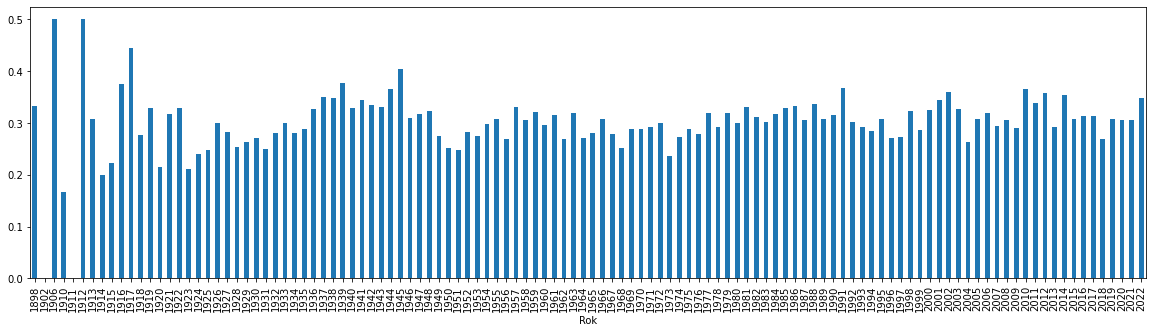

In [7]:
pd.Series((herectvo[herectvo["Gender"] == "žena"].groupby("Rok")["Jméno"].nunique()) / (herectvo.groupby("Rok")["Jméno"].nunique())).plot.bar(figsize = (20,5))

#POZN LOL

## Režie aj.

In [8]:
df = pd.read_json("filmy.json")

In [17]:
df = df.explode("Režie").explode("Scénář").explode("Typologie")

In [18]:
df["Režie gender"] = df["Režie"].apply(lambda x: gender(x))

In [19]:
hrany = df[df["Typologie"] == "hraný"]

<AxesSubplot:xlabel='Copyright'>

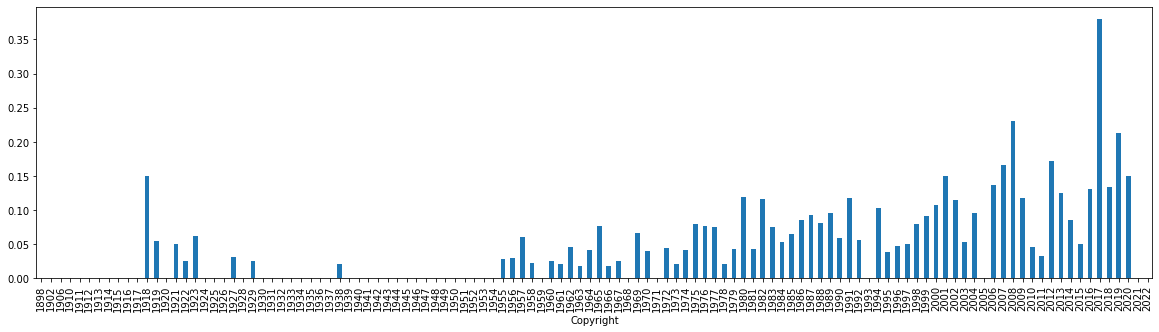

In [20]:
pd.Series((hrany[hrany["Režie gender"] == "žena"].groupby("Copyright")["Film"].nunique()) / (hrany.groupby("Copyright")["Film"].nunique())).plot.bar(figsize = (20,5))

In [23]:
hrany["Scénář gender"] = hrany["Scénář"].apply(lambda x: gender(x))

C:\Users\micha\AppData\Local\Temp\ipykernel_1700\3571497942.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hrany["Scénář gender"] = hrany["Scénář"].apply(lambda x: gender(x))


<AxesSubplot:xlabel='Copyright'>

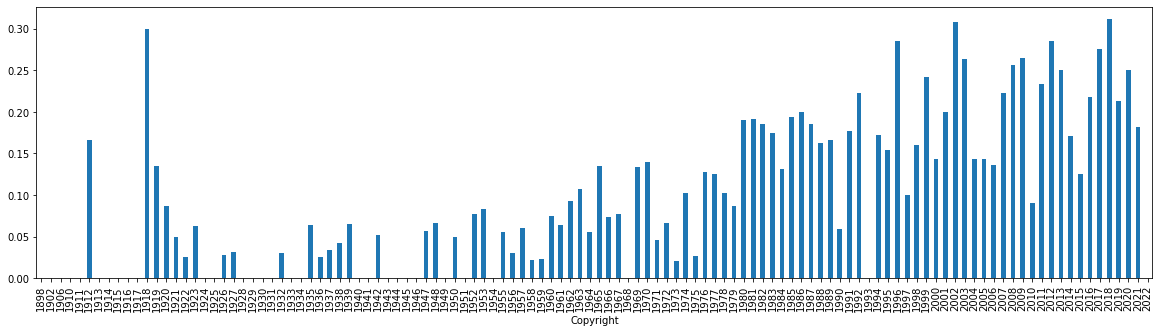

In [24]:
pd.Series((hrany[hrany["Scénář gender"] == "žena"].groupby("Copyright")["Film"].nunique()) / (hrany.groupby("Copyright")["Film"].nunique())).plot.bar(figsize = (20,5))

## Věková distribuce

<AxesSubplot:ylabel='Frequency'>

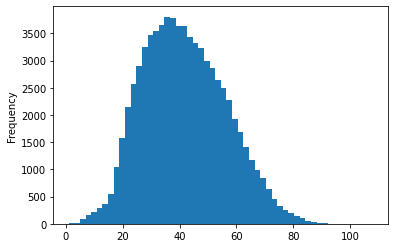

In [51]:
herectvo["Věk"].plot.hist(bins=54)

<AxesSubplot:ylabel='Frequency'>

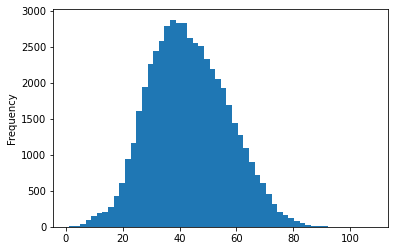

In [55]:
herectvo[herectvo["Gender"] == "muž"]["Věk"].plot.hist(bins=54)

<AxesSubplot:ylabel='Frequency'>

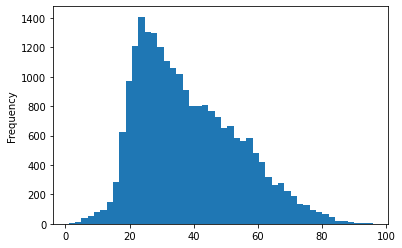

In [78]:
herectvo[herectvo["Gender"] == "žena"]["Věk"].plot.hist(bins=48)

<AxesSubplot:xlabel='Rok'>

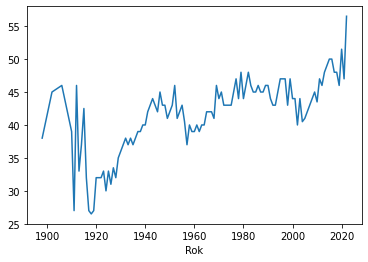

In [80]:
herectvo[herectvo["Gender"] == "muž"].groupby("Rok")["Věk"].median().plot()

<AxesSubplot:xlabel='Rok'>

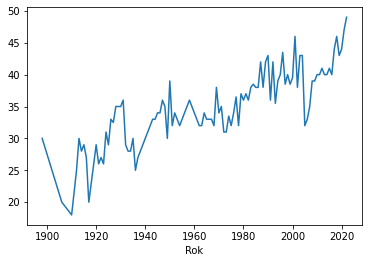

In [82]:
herectvo[(herectvo["Gender"] == "žena")].groupby("Rok")["Věk"].median().plot()

In [41]:
herectvo.groupby("Jméno")["Věk"].max().nlargest()

Jméno
Jaroslav Hilbert (63466)      108.0
František Kovářík (126912)    104.0
Zdeněk Procházka (127279)     100.0
Zita Kabátová (839)            96.0
Miroslav Mráz (125568)         95.0
Name: Věk, dtype: float64

## Unikátní filmy

In [89]:
herectvo.groupby("Film")["Věk"].median().nlargest(10)

Film
Pomalu, ale slábnu (78814)         86.5
Panenství Lídy Baarové (400756)    83.0
Ďábel (396930)                     82.0
Tlumočník (401728)                 80.0
Pamětnice (123955)                 78.0
Školní výlet (181928)              76.0
Aby nebyli sami (396344)           75.0
Kouzelná skříň (397535)            73.0
Je třeba zabít Sekala (163291)     72.5
Pátá loď (401180)                  72.0
Name: Věk, dtype: float64

In [90]:
herectvo.groupby("Film")["Věk"].median().nsmallest(10)

Film
Červená Karkulka (402180)                5.0
Potkal jsem ho v zoo (397759)           11.0
Klaun Ferdinand a raketa (396499)       12.0
Oliver Twist (37449)                    12.0
Malý sen (396231)                       13.0
Školní úkol [německá verze] (401193)    13.0
Dobrodružství na Labi (396920)          14.0
Cesta do pravěku (396218)               14.5
Československý Ježíšek (395161)         15.0
Černý démant (398743)                   15.5
Name: Věk, dtype: float64

In [103]:
pd.Series(herectvo[herectvo["Gender"] == "muž"].groupby("Film")["Jméno"].nunique() / herectvo[herectvo["Gender"] == "žena"].groupby("Film")["Jméno"].nunique()).sort_values().head(20)

Film
Životní povinnost (398572)                         0.200000
Obrázky z výletu (53015)                           0.250000
Housata (397247)                                   0.272727
O malých pro velké (396081)                        0.333333
Alcron (396518)                                    0.333333
Anně K. je zima (400452)                           0.333333
Na půdě aneb Kdo má dneska narozeniny? (45356)     0.333333
Návrat z Tripolisu (397305)                        0.333333
Den jako stvořený pro banánové rybičky (397691)    0.333333
ELFilm (10574)                                     0.333333
Konec srpna v hotelu Ozon (396700)                 0.333333
Pohádka o knoflíku (395986)                        0.333333
Magdalena (396574)                                 0.333333
Špendlík na motýla (7788)                          0.333333
Hrad z písku (8249)                                0.333333
Jiří Trnka: Nalezený přítel (401905)               0.333333
Okamžik, spojím! (396424)          

In [108]:
pd.Series(herectvo[herectvo["Gender"] == "muž"].groupby("Film")["Jméno"].nunique() / herectvo[herectvo["Gender"] == "žena"].groupby("Film")["Jméno"].nunique()).sort_values().sample(60)

Film
Kdo přichází před půlnocí (397233)                              4.800000
Tulákovo srdce (395305)                                         3.000000
Hudba z Marsu (396219)                                          3.800000
Adagio (396885)                                                 1.000000
Romeo, Julie a tma (396351)                                     1.583333
Dahome (397352)                                                      NaN
Zlatý podraz (401841)                                           6.750000
Otázka cti (397504)                                             3.000000
O zapomnětlivém černokněžníkovi (397671)                        2.625000
Zlepšovák (396391)                                                   NaN
Polibek ve sněhu (395672)                                       0.750000
Zkouška pokračuje (396355)                                      2.285714
Cyril a Metoděj – Apoštolové Slovanů (400549)                   9.250000
Odlet (397218)                                